# Lecture 4.1 - Basis Expansion - Adding non-linearity to linear methods.  

## What you'll learn today
1.  How to extend linear methods (regression, logistic regression, SVM, etc.) to model non-linear behavior
2.  How to generate new features to better model complicated data. 
3.  How to judge whether basis expansion improves your results. 


## References
http://www.physics.utah.edu/~bolton/bspline08.pdf  
https://github.com/johntfoster/bspline/blob/master/bspline.py  
http://johntfoster.github.io/posts/pythonnumpy-implementation-of-bspline-basis-functions.html  
http://devosaurus.blogspot.com/2013/10/exploring-b-splines-in-python.html  
https://www.cs.mtu.edu/~shene/COURSES/cs3621/NOTES/spline/B-spline/bspline-basis.html  
http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf - see page 143 for spline discussion

## What is basis expansion
Basis expansion means adding new features that are functions of your old features.  Adding new features may improve your performance.  

### Adding new features may improve performance

The figure below gives and example where adding a new feature can make a dramatic improve in linear classifier performance.  The figure on the left shows the original problem.  One class (designated by red circles) are completely enclosed by the other class (black x's).  This will be a tough problem for a linear classifier.  A straight line in the plane isn't going to do as well as you can do with your eye.  On the other hand, If you add a new feature which is the sum of squares of the old features, then you can see how the new feature makes it possible to linearly separate the red circles from the black x's.  

<img src='images/7FyLd.jpg'>

Here are some examples to demonstrate how that might work.  

###  Simple regression examples

Suppose that you're given a problem like the one in the simple code example below.  

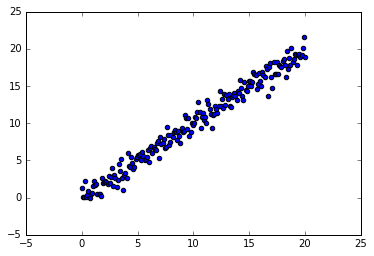

(200, 1) (200, 1)


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

#generate x values
x = np.linspace(0.0, 20.0, 200).reshape((200,1))

#add a little noise for y
y = x + np.random.normal(size=x.shape)
plt.scatter(x,y)
plt.show()
print(x.shape, y.shape)

It's easy to fit a straight line using linear_model.  Here's the code and the resulting plot

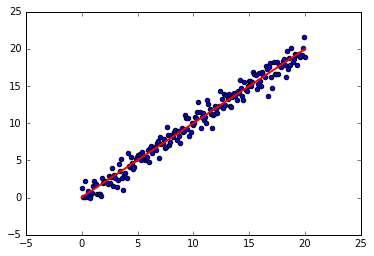

In [2]:
lm = LinearRegression()
lm.fit(x,y)
lm.coef_.shape
yHat = lm.intercept_ + lm.coef_ * x
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')


That was easy and worked well.  Let's change the problem a little.  Suppose that instead of $y = x$,  $\,\,y = x^2 /\, 20$.  Then what happens?  

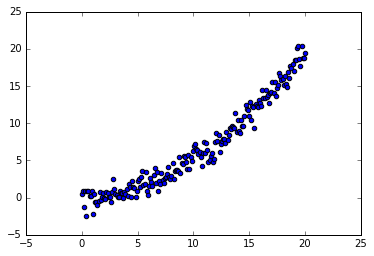

(200, 1) (200, 1)


In [3]:
#here y is related to the square of the attribute
y = x*x / 20.0 + np.random.normal(size=x.shape)
plt.scatter(x,y)
plt.show()
print(x.shape, y.shape)

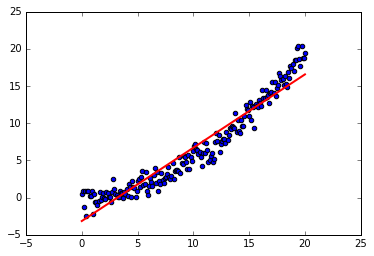

In [4]:
lm = LinearRegression()
lm.fit(x,y)
lm.coef_.shape
yHat = lm.intercept_ + lm.coef_ * x
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')

Now the straight line doesn't fit very well.  But suppose we add a new variable.  Instead of just trying to predict y with x, you add a new variable $x^2$

In [5]:
X = np.concatenate((x, x*x), axis=1) 
X.shape

(200, 2)

[[ 0.0654418   0.04600846]]
[-0.09872338]


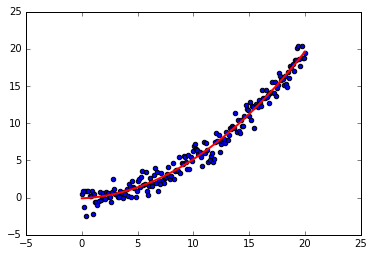

In [6]:
lm = LinearRegression()
lm.fit(X,y)
lm.coef_.shape
print(lm.coef_) #row vector
print(lm.intercept_) #intercept
yHat = lm.intercept_ + np.dot(X, np.transpose(lm.coef_ )) #broadcast across dimensions to each element in matrix
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')

## How to implement basis expansion

Usually you're not going to know what functions of the original attributes are going to give you the most performance improvement.  You have to try a few things and see what works.  It would be reasonable to add in squares and cross products of your original attributes to see if that helps.  Each row in your data matrix would go from $[x_1, x_2, ... , x_n]$ to $[x_1, x_2, ... , x_n, x_1^2, x_2^2, ... , x_n^2, x_1*x_2, x_1*x_3, etc]$

Remember that adding new features is going to increase your feature space size and you'll be more likely to overfit with OLS.  Now that you've got an approach for regularizing  regression and logistic regression, you can let your penalized algorithm take care of avoiding overfitting.  

## What if the function relating attribute to label isn't well modeled by polynomial?
Suppose that the functional relationship between the attributes and the labels radically different from linear plus quadratic.  The simple example below will illustrate.  


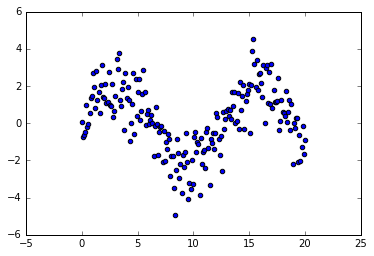

In [7]:
#here y is related to the square of the attribute
y = 2.0*np.sin(x/2.0) + np.random.normal(size=x.shape)
plt.scatter(x,y)
plt.show()


## Approximating unknown functions with spline functions
If you can find a family of functions that you can add together (with coefficients) to approximate the function you're tryin to machine learn, then you can use penalized regression (or other linear method) to find the best values of the coefficients and to prevent over-fitting.  Throwing in quadratic (and higher) terms may work but that process has some inherent difficulties with fitting arbitrary functions.  This brings us to spline functions.  Elements of statistical learning has a good explanation of spline functions.  http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf - see page 143 for spline discussion.  


https://www.cs.mtu.edu/~shene/COURSES/cs3621/NOTES/spline/B-spline/bspline-basis.html - has an easy to understand equations for generating spline functions of all orders.  

http://www.physics.utah.edu/~bolton/bspline08.pdf - gives a good visual explanation

We're using a program put together by John Foster and available on his github page.  https://github.com/johntfoster/bspline/blob/master/bspline.py  


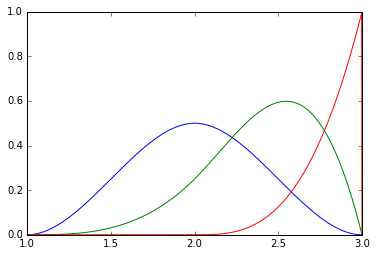

In [8]:
from bspline import Bspline
from bspline import Bspline

knot_vector = [1,1,2,3,3,3,3,3]
basis = Bspline(knot_vector,3)

%matplotlib inline
basis.plot()

In [9]:
#Use the __call__ function to retrieve 
basis.__call__(1)

array([ 0.,  0.,  0.,  0.])

In [10]:
np.shape(x)

(200, 1)

In [11]:
x[0,0]

0.0

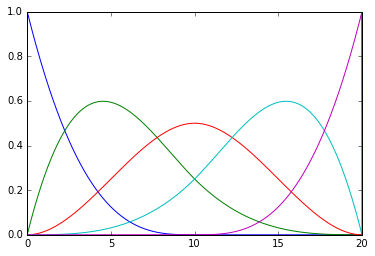

[ 1.  0.  0.  0.  0.]


In [12]:
#Use this for the problem of approximating sin(x)
#define the knot vector using the max and min of the data (how would you define knots for a general problem?)
knot_vector = [0.0, 0.0, 0.0, 0.0, 10.0, 20.0, 20.0,20.0,20.0]
basis = Bspline(knot_vector, 3)
basis.plot()
basisExample = basis.__call__(knot_vector[0])
print(basisExample)
#Build new feature matrix - old features replaced by vector of b-spline basis functions
nFeatures = len(basisExample)
X = np.zeros((len(x), nFeatures))
for i in range(len(x)):
    X[i,:] = basis.__call__(x[i,0])

In [13]:
np.shape(X)

(200, 5)

In [14]:
print(X[0,:], basis.__call__(x[0,0]))  #check to see that the first row of data = basis functions for first attribute

[ 1.  0.  0.  0.  0.] [ 1.  0.  0.  0.  0.]


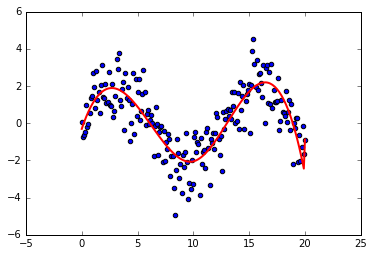

In [15]:
lm = LinearRegression()
lm.fit(X,y)
lm.coef_.shape
yHat = lm.intercept_ + np.dot(X, np.transpose(lm.coef_ ))
plt.scatter(x,y)
plt.plot(x,yHat, linewidth=2.0, color='r')

## Laboratory Exercise 4.1 - Applying basis expansion
Use basis expansion to increase the number of features in breast cancer data set.  Take two approaches.  For one approach, simple add the squares of the features to the feature matrix.  For the second use cubic spline basis functions.  To solve this you can use sklearn.linear_model.SGDClassifier.  Here's a link to the package documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html . Choose the options for SCDClassifier so that you get logistic regression with an elastic net penalty.

In [16]:
import pandas as pd
import statsmodels.api as smf

In [17]:
h = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape',\
          'marginal_adhesion','single_epithelial_cell_use','bare_nuclei','bland_chromatin','normal_nuceoli','mitosis',\
         'class']
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',\
                           names=h)
breast_cancer_dropped = breast_cancer[breast_cancer.bare_nuclei.str.contains('\?')==False]
breast_cancer_dropped.bare_nuclei=pd.to_numeric(breast_cancer_dropped.bare_nuclei) #set object to integer
breast_cancer_dropped.drop(['sample_code_number'],axis=1,inplace=True)

X = breast_cancer_dropped.values[:,0:(breast_cancer_dropped.values.shape[1]-1)].astype(int)


y = breast_cancer_dropped.values[:,-1].astype(int)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
breast_cancer_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness               683 non-null int64
uniformity_of_cell_size       683 non-null int64
uniformity_of_cell_shape      683 non-null int64
marginal_adhesion             683 non-null int64
single_epithelial_cell_use    683 non-null int64
bare_nuclei                   683 non-null int64
bland_chromatin               683 non-null int64
normal_nuceoli                683 non-null int64
mitosis                       683 non-null int64
class                         683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB


In [19]:
breast_cancer.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_use,bare_nuclei,bland_chromatin,normal_nuceoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Populating the interactive namespace from numpy and matplotlib


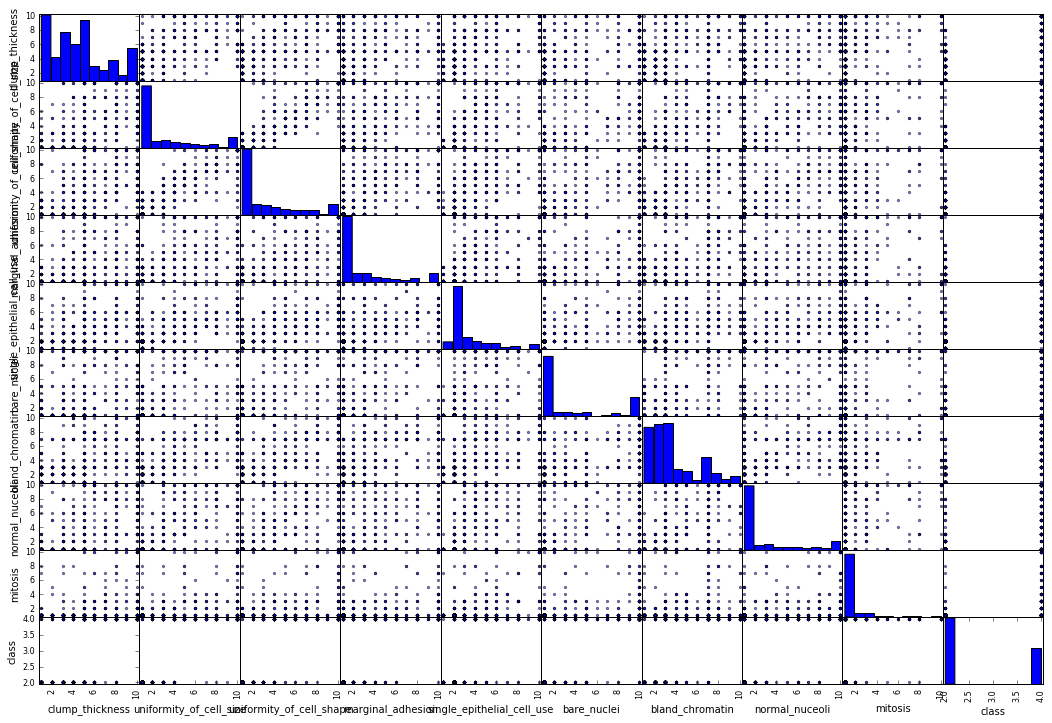

In [20]:
%pylab inline
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
pd.scatter_matrix(breast_cancer_dropped, figsize=(18,12));


First, model without the  addition of any basis expansion.

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
X =breast_cancer_dropped[[ 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_use', 'bare_nuclei', 'bland_chromatin',
       'normal_nuceoli', 'mitosis']]
y=breast_cancer_dropped['class']

X.loc[:,'constant']=1
model = smf.OLS(y,X).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                OLS                Adj. R-squared:       0.841    
Dependent Variable:   class              AIC:                  627.7974 
Date:                 2016-11-19 13:16   BIC:                  673.0623 
No. Observations:     683                Log-Likelihood:       -303.90  
Df Model:             9                  F-statistic:          402.5    
Df Residuals:         673                Prob (F-statistic):   4.46e-264
R-squared:            0.843              Scale:                0.14468  
------------------------------------------------------------------------
                           Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------
clump_thickness            0.0634   0.0071  8.8981 0.0000  0.0494 0.0774
uniformity_of_cell_size    0.0437   0.0127  3.4278 0.0006  0.0187 0.0687
uniformity_of_cell_shape   0.0313   0.0125  2.5078 0.0124  0.0068 0.0558
marginal_adhesion          0.0165   0.0080  2.0647 0.0393  0.0008 0.0322
single_epithelial_cell_use 0.0202   0.0105  1.9236 0.0548 -0.0004 0.0407
bare_nuclei                0.0908   0.0064 14.0914 0.0000  0.0781 0.1034
bland_chromatin            0.0384   0.0101  3.8015 0.0002  0.0185 0.0582
normal_nuceoli             0.0371   0.0074  4.9811 0.0000  0.0225 0.0517
mitosis                    0.0020   0.0099  0.1971 0.8438 -0.0175 0.0215
constant                   1.5047   0.0328 45.8073 0.0000  1.4402 1.5692
------------------------------------------------------------------------
Omnibus:                84.326         Durbin-Watson:            1.753  
Prob(Omnibus):          0.000          Jarque-Bera (JB):         461.869
Skew:                   0.383          Prob(JB):                 0.000  
Kurtosis:               6.955          Condition No.:            28     
========================================================================

"""

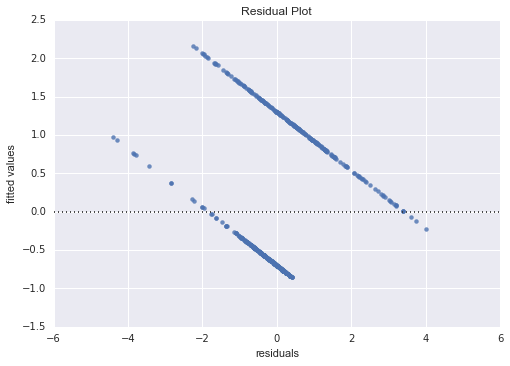

In [23]:
sns.residplot(model.resid_pearson,model.fittedvalues)
plt.xlabel('residuals')
plt.ylabel('fitted values')
plt.title('Residual Plot');

- We can see this model is not a good fit because we are prediction a bernouli event. There are also some variables that are not statistically significant, but we will leave them in for now.
- Add in basis expansion terms below.

In [24]:
breast_cancer_dropped['clump_thickness**2']=breast_cancer_dropped.clump_thickness**2
breast_cancer_dropped['uniformity_of_cell_size**2']=breast_cancer_dropped.uniformity_of_cell_size**2
breast_cancer_dropped['uniformity_of_cell_shape**2']=breast_cancer_dropped.uniformity_of_cell_shape**2
breast_cancer_dropped['marginal_adhesion**2']=breast_cancer_dropped.marginal_adhesion**2
breast_cancer_dropped['single_epithelial_cell_use**2']=breast_cancer_dropped.single_epithelial_cell_use**2
breast_cancer_dropped['bare_nuclei**2']=breast_cancer_dropped.bare_nuclei**2
breast_cancer_dropped['bland_chromatin**2']=breast_cancer_dropped.bland_chromatin**2
breast_cancer_dropped['normal_nuceoli**2']=breast_cancer_dropped.normal_nuceoli**2
breast_cancer_dropped['mitosis**2']=breast_cancer_dropped.mitosis**2



/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [25]:
breast_cancer_dropped.columns


Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_use', 'bare_nuclei', 'bland_chromatin',
       'normal_nuceoli', 'mitosis', 'class', 'clump_thickness**2',
       'uniformity_of_cell_size**2', 'uniformity_of_cell_shape**2',
       'marginal_adhesion**2', 'single_epithelial_cell_use**2',
       'bare_nuclei**2', 'bland_chromatin**2', 'normal_nuceoli**2',
       'mitosis**2'],
      dtype='object')

In [26]:
X_2 =breast_cancer_dropped[['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_use', 'bare_nuclei', 'bland_chromatin',
       'normal_nuceoli', 'mitosis', 'clump_thickness**2',
       'uniformity_of_cell_size**2', 'uniformity_of_cell_shape**2',
       'marginal_adhesion**2', 'single_epithelial_cell_use**2',
       'bare_nuclei**2', 'bland_chromatin**2', 'normal_nuceoli**2',
       'mitosis**2']]
y_2=breast_cancer_dropped['class']

X_2.loc[:,'constant']=1

model2 = smf.OLS(y_2,X_2).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                   OLS                 Adj. R-squared:        0.869    
Dependent Variable:      class               AIC:                   507.7873 
Date:                    2016-11-19 13:16    BIC:                   593.7907 
No. Observations:        683                 Log-Likelihood:        -234.89  
Df Model:                18                  F-statistic:           251.3    
Df Residuals:            664                 Prob (F-statistic):    5.52e-282
R-squared:               0.872               Scale:                 0.11981  
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
clump_thickness               -0.0291   0.0187 -1.5542 0.1206 -0.0658  0.0077
uniformity_of_cell_size        0.1392   0.0360  3.8684 0.0001  0.0685  0.2099
uniformity_of_cell_shape       0.1652   0.0320  5.1671 0.0000  0.1024  0.2280
marginal_adhesion              0.0156   0.0261  0.5985 0.5497 -0.0356  0.0668
single_epithelial_cell_use     0.0547   0.0358  1.5308 0.1263 -0.0155  0.1250
bare_nuclei                    0.1491   0.0272  5.4748 0.0000  0.0956  0.2026
bland_chromatin                0.0890   0.0256  3.4724 0.0005  0.0387  0.1394
normal_nuceoli                 0.0522   0.0270  1.9346 0.0535 -0.0008  0.1052
mitosis                        0.0464   0.0341  1.3623 0.1736 -0.0205  0.1133
clump_thickness**2             0.0072   0.0017  4.2729 0.0000  0.0039  0.0105
uniformity_of_cell_size**2    -0.0081   0.0029 -2.7934 0.0054 -0.0139 -0.0024
uniformity_of_cell_shape**2   -0.0125   0.0027 -4.5917 0.0000 -0.0178 -0.0072
marginal_adhesion**2           0.0006   0.0023  0.2572 0.7971 -0.0039  0.0051
single_epithelial_cell_use**2 -0.0030   0.0030 -0.9937 0.3207 -0.0089  0.0029
bare_nuclei**2                -0.0077   0.0023 -3.2920 0.0010 -0.0122 -0.0031
bland_chromatin**2            -0.0054   0.0024 -2.2312 0.0260 -0.0102 -0.0007
normal_nuceoli**2             -0.0026   0.0024 -1.0972 0.2730 -0.0074  0.0021
mitosis**2                    -0.0037   0.0034 -1.0855 0.2781 -0.0105  0.0030
constant                       1.1749   0.0764 15.3728 0.0000  1.0248  1.3250
-----------------------------------------------------------------------------
Omnibus:                 153.356          Durbin-Watson:             1.795   
Prob(Omnibus):           0.000            Jarque-Bera (JB):          1405.489
Skew:                    -0.719           Prob(JB):                  0.000   
Kurtosis:                9.879            Condition No.:             549     
=============================================================================

"""

- Adding in squarred terms does help our Adj R^2. Let's remove the insignificant variables next.

In [27]:
X_3 =breast_cancer_dropped[[ 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 
        'bare_nuclei', 'bland_chromatin',
        'clump_thickness**2',
       'uniformity_of_cell_size**2', 'uniformity_of_cell_shape**2',
        
       'bare_nuclei**2', 'bland_chromatin**2' 
       ]]
y_3=breast_cancer_dropped['class']

X_3.loc[:,'constant']=1
smf.add_constant(X_3,prepend = False)

model3 = smf.OLS(y_3,X_3).fit()
model3.summary2()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                 Adj. R-squared:        0.861    
Dependent Variable:    class               AIC:                   534.5480 
Date:                  2016-11-19 13:16    BIC:                   579.8130 
No. Observations:      683                 Log-Likelihood:        -257.27  
Df Model:              9                   F-statistic:           472.3    
Df Residuals:          673                 Prob (F-statistic):    5.40e-284
R-squared:             0.863               Scale:                 0.12622  
---------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
uniformity_of_cell_size      0.1889   0.0354  5.3342 0.0000  0.1194  0.2584
uniformity_of_cell_shape     0.1723   0.0321  5.3705 0.0000  0.1093  0.2353
bare_nuclei                  0.1658   0.0272  6.0947 0.0000  0.1124  0.2192
bland_chromatin              0.1005   0.0259  3.8774 0.0001  0.0496  0.1514
clump_thickness**2           0.0047   0.0006  7.6773 0.0000  0.0035  0.0059
uniformity_of_cell_size**2  -0.0104   0.0029 -3.5662 0.0004 -0.0161 -0.0047
uniformity_of_cell_shape**2 -0.0123   0.0027 -4.5037 0.0000 -0.0176 -0.0069
bare_nuclei**2              -0.0084   0.0023 -3.6245 0.0003 -0.0130 -0.0039
bland_chromatin**2          -0.0053   0.0024 -2.1481 0.0321 -0.0101 -0.0005
constant                     1.2347   0.0498 24.8151 0.0000  1.1370  1.3324
---------------------------------------------------------------------------
Omnibus:                 145.772         Durbin-Watson:            1.792   
Prob(Omnibus):           0.000           Jarque-Bera (JB):         1245.689
Skew:                    -0.690          Prob(JB):                 0.000   
Kurtosis:                9.471           Condition No.:            305     
===========================================================================

"""

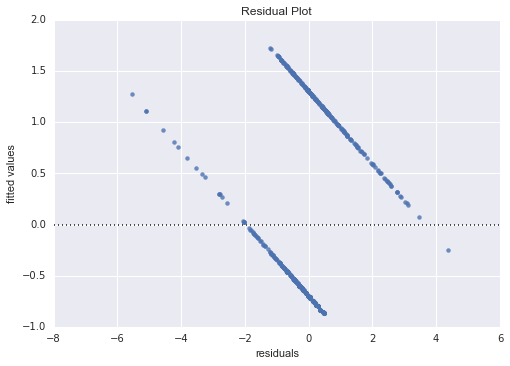

In [28]:
sns.residplot(model3.resid_pearson,model3.fittedvalues)
plt.xlabel('residuals')
plt.ylabel('fitted values')
plt.title('Residual Plot');

> Add in cubic terms and see if significant.

In [29]:
breast_cancer_dropped['clump_thickness**3']=breast_cancer_dropped.clump_thickness**3
breast_cancer_dropped['uniformity_of_cell_size**3']=breast_cancer_dropped.uniformity_of_cell_size**3
breast_cancer_dropped['uniformity_of_cell_shape**3']=breast_cancer_dropped.uniformity_of_cell_shape**3
breast_cancer_dropped['bare_nuclei**3']=breast_cancer_dropped.bare_nuclei**3

breast_cancer_dropped['bland_chromatin**3']=breast_cancer_dropped.bland_chromatin**3


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [30]:
breast_cancer_dropped.columns

Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_use', 'bare_nuclei', 'bland_chromatin',
       'normal_nuceoli', 'mitosis', 'class', 'clump_thickness**2',
       'uniformity_of_cell_size**2', 'uniformity_of_cell_shape**2',
       'marginal_adhesion**2', 'single_epithelial_cell_use**2',
       'bare_nuclei**2', 'bland_chromatin**2', 'normal_nuceoli**2',
       'mitosis**2', 'clump_thickness**3', 'uniformity_of_cell_size**3',
       'uniformity_of_cell_shape**3', 'bare_nuclei**3', 'bland_chromatin**3'],
      dtype='object')

In [31]:
X_4 =breast_cancer_dropped[[ 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 
        'bare_nuclei', 'bland_chromatin',
        'clump_thickness**2',
       'uniformity_of_cell_size**2', 'uniformity_of_cell_shape**2',
        
       'bare_nuclei**2', 'bland_chromatin**2','clump_thickness**3', 'uniformity_of_cell_size**3',
       'uniformity_of_cell_shape**3', 'bare_nuclei**3', 'bland_chromatin**3'
       ]]
y_4=breast_cancer_dropped['class']

X_4.loc[:,'constant']=1
smf.add_constant(X_4,prepend = False)

model4 = smf.OLS(y_4,X_4).fit()
model4.summary2()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                  OLS                Adj. R-squared:       0.861    
Dependent Variable:     class              AIC:                  542.2311 
Date:                   2016-11-19 13:16   BIC:                  610.1286 
No. Observations:       683                Log-Likelihood:       -256.12  
Df Model:               14                 F-statistic:          302.6    
Df Residuals:           668                Prob (F-statistic):   5.84e-278
R-squared:              0.864              Scale:                0.12673  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
uniformity_of_cell_size      0.1990   0.0768  2.5918 0.0098  0.0482 0.3497
uniformity_of_cell_shape     0.1560   0.0722  2.1614 0.0310  0.0143 0.2978
bare_nuclei                  0.2318   0.0812  2.8538 0.0045  0.0723 0.3912
bland_chromatin              0.0411   0.0556  0.7388 0.4603 -0.0681 0.1502
clump_thickness**2           0.0039   0.0029  1.3202 0.1872 -0.0019 0.0096
uniformity_of_cell_size**2  -0.0139   0.0170 -0.8181 0.4136 -0.0473 0.0195
uniformity_of_cell_shape**2 -0.0076   0.0163 -0.4646 0.6424 -0.0396 0.0245
bare_nuclei**2              -0.0250   0.0188 -1.3310 0.1837 -0.0620 0.0119
bland_chromatin**2           0.0099   0.0128  0.7740 0.4392 -0.0153 0.0351
clump_thickness**3           0.0001   0.0003  0.2876 0.7738 -0.0005 0.0006
uniformity_of_cell_size**3   0.0003   0.0011  0.2350 0.8143 -0.0018 0.0023
uniformity_of_cell_shape**3 -0.0003   0.0010 -0.3013 0.7633 -0.0023 0.0017
bare_nuclei**3               0.0011   0.0012  0.8988 0.3691 -0.0012 0.0034
bland_chromatin**3          -0.0010   0.0009 -1.2064 0.2281 -0.0027 0.0006
constant                     1.2530   0.1047 11.9712 0.0000  1.0475 1.4585
--------------------------------------------------------------------------
Omnibus:                138.584         Durbin-Watson:            1.795   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         1154.346
Skew:                   -0.648          Prob(JB):                 0.000   
Kurtosis:               9.236           Condition No.:            6147    
==========================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

> Adding in cubic terms makes the coefficients not significant, we still stick with our squarred terms above. This does not satisfy the conditions of linear regression, but it better captures the binary nature of prediction class (cancer or not). The best r^2 we achieved was 0.861.

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

 For one approach, simple add the squares of the features to the feature matrix. For the second use cubic spline basis functions. To solve this you can use sklearn.linear_model.SGDClassifier. Here's a link to the package documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html . Choose the options for SCDClassifier so that you get logistic regression with an elastic net penalty.

In [33]:
h = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape',\
          'marginal_adhesion','single_epithelial_cell_use','bare_nuclei','bland_chromatin','normal_nuceoli','mitosis',\
         'class']
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',\
                           names=h)
breast_cancer_d = breast_cancer[breast_cancer.bare_nuclei.str.contains('\?')==False]
breast_cancer_d.bare_nuclei=pd.to_numeric(breast_cancer_d.bare_nuclei) #set object to integer
breast_cancer_d.drop(['sample_code_number'],axis=1,inplace=True)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
X_breast_cancer = breast_cancer_d.iloc[:,:-1]
y_breast_cancer = breast_cancer_d.iloc[:,-1:]


In [35]:
breast_cancer_d.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_use,bare_nuclei,bland_chromatin,normal_nuceoli,mitosis,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [47]:

#define the knot vector using the max and min of the data (how would you define knots for a general problem?)
knot_vector = np.array([[1.0, 1.0, 1.0, 1.0,5.0, 10.0, 10.0,10.0,10.0], # clump thickenss
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #cell size uniorm
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #marginal adhesion
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0],# single epithelial cell use
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #bare nuclei
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #bland_chromatin
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #normal nuceoli
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0]])# mitosis
##all knot vectors are the same, so take the first one for the basis

print(knot_vector[0])                               
basis = Bspline(list(knot_vector[0]), 3) 

print(basis)
#[bas.plot() for bas in basis]
basisExample = basis.__call__(knot_vector[0,0])
print(basisExample)
#Build new feature matrix - old features replaced by vector of b-spline basis functions
nFeatures =  len(basisExample) #get columns
X_new = np.zeros((len(X_breast_cancer), nFeatures))
#print(len(X_breast_cancer))

for i in range(len(X_breast_cancer)):
    #print(i)
    X_new[i,:] = basis.__call__(X_breast_cancer.iloc[i,0])

[  1.   1.   1.   1.   5.  10.  10.  10.  10.]
[ 1.  0.  0.  0.  0.]


In [48]:
#X_new is now cubic spline functions

In [49]:
#train on the cubix splines
X_train, X_test, y_train, y_test = train_test_split(X_new,y_breast_cancer)


In [50]:
y_test= np.array(y_test)


In [51]:
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [52]:
#normalize our features
scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test =scale.fit_transform(X_test)


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.853801169591  Best R^2
1e-05 Best L1 ratio
0.101011090909   Best alpha value


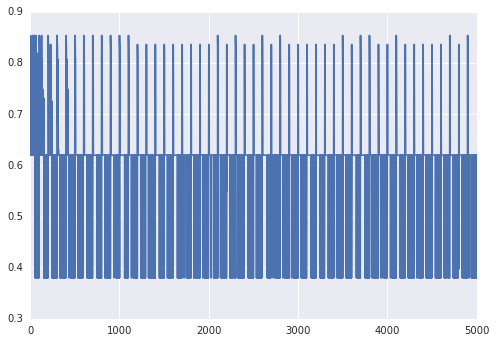

In [58]:
### Stochastic Gradient Descent using cubic splines
rmse = []
r_2_score = []
l_vals = []
alphas = []
for l in np.linspace(.00001,1,50):
    for a in np.linspace(.000001,10,100):
        SGDmodel = SGDClassifier(loss='log',penalty='elasticnet',l1_ratio=l,alpha = a)
        SGDmodel.fit(X_train,y_train)
        #print(SGDmodel.predict(X_test),'predictions')
        #print(list(y_test),'actual')
        #print((y_test-SGDmodel.predict(X_test)))
        #print(np.linalg.norm(y_test-SGDmodel.predict(X_test)))
        rmse.append(np.linalg.norm(y_test-SGDmodel.predict(X_test))/sqrt(len(y_test)))
        r_2_score.append(SGDmodel.score(X_test,y_test))


        l_vals.append(l) ##different l1 ratios
        alphas.append(a)
        
plt.plot(r_2_score)
print(r_2_score[np.argmax(r_2_score)], ' Best R^2')
print(l_vals[np.argmax(r_2_score)],'Best L1 ratio')
print(alphas[np.argmax(r_2_score)], '  Best alpha value')


- Using cubic splines above, we see that we achieve a better model in terms of R^2 than using basis expansion (86.1% vs ~87.5%). In addition, using a logistic regression gives us fewer restrictions for our independent variables, which makes this a better model.

## Try to run splines with a different number of knot vectors.

In [56]:

#define the knot vector using the max and min of the data (how would you define knots for a general problem?)
knot_vector = np.array([[0.0, 1.0, 1.0, 1.0, 5.0, 10.0, 10.0,10.0,11.0], # clump thickenss
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #cell size uniorm
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #marginal adhesion
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0],# single epithelial cell use
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #bare nuclei
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #bland_chromatin
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0], #normal nuceoli
                        [1.0,1.0,1.0,1.0,5.0,10.0,10.0,10.0,10.0]])# mitosis
##all knot vectors are the same, so take the first one for the basis

print(knot_vector[0])                               
basis = Bspline(list(knot_vector[0]), 3) 

print(basis)
#[bas.plot() for bas in basis]
basisExample = basis.__call__(knot_vector[0,0])
print(basisExample)
#Build new feature matrix - old features replaced by vector of b-spline basis functions
nFeatures =  len(basisExample) #get columns
X_new = np.zeros((len(X_breast_cancer), nFeatures))

for i in range(len(X_breast_cancer)):
    X_new[i,:] = basis.__call__(X_breast_cancer.iloc[i,0])

[  0.   1.   1.   1.   5.  10.  10.  10.  11.]
[ 0.  0.  0.  0.  0.]


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.853801169591  Best R^2
1e-05 Best L1 ratio
0.101011090909   Best alpha value


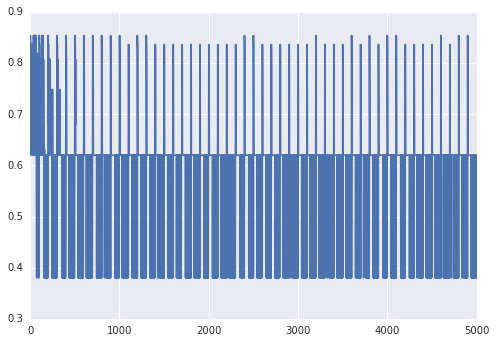

In [57]:
#train on the cubix splines
X_train, X_test, y_train, y_test = train_test_split(X_new,y_breast_cancer)
y_test= np.array(y_test)


#normalize our features
scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test =scale.fit_transform(X_test)

### Stochastic Gradient Descent using cubic splines
rmse = []
r_2_score = []
l_vals = []
alphas = []
for l in np.linspace(.00001,1,50): #go through each l1 ratio
    for a in np.linspace(.000001,10,100): # go through each alpha
        SGDmodel = SGDClassifier(loss='log',penalty='elasticnet',l1_ratio=l,alpha = a)
        SGDmodel.fit(X_train,y_train)

        rmse.append(np.linalg.norm(y_test-SGDmodel.predict(X_test))/sqrt(len(y_test)))
        r_2_score.append(SGDmodel.score(X_test,y_test))


        l_vals.append(l) ##different l1 ratios
        alphas.append(a)
        
plt.plot(r_2_score)
print(r_2_score[np.argmax(r_2_score)], ' Best R^2')
print(l_vals[np.argmax(r_2_score)],'Best L1 ratio')
print(alphas[np.argmax(r_2_score)], '  Best alpha value')



> Interesting, it does worse with more extreme knot vectors.

In [ ]:
breast_cancer_dropped.describe()